# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

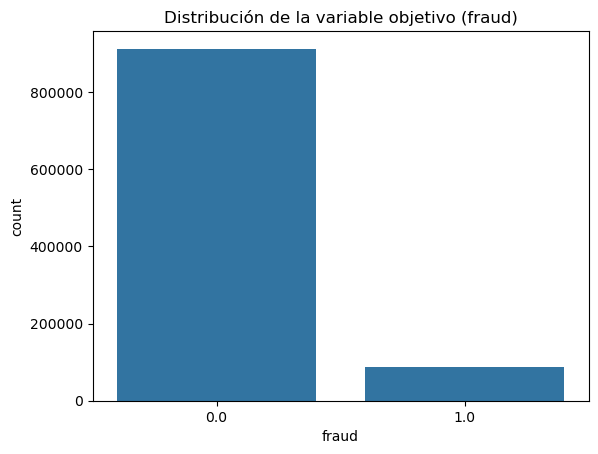

fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


In [3]:
#1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
# fraud = pd.read_csv("path_to_fraud_dataset.csv")

# Revisar la distribución de la variable objetivo (fraud)
sns.countplot(x='fraud', data=fraud)
plt.title('Distribución de la variable objetivo (fraud)')
plt.show()

# Porcentaje de fraude frente a no fraude
fraud_ratio = fraud['fraud'].value_counts(normalize=True) * 100
print(fraud_ratio)

In [4]:
#2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Definir las características y la variable objetivo
X = fraud.drop(columns='fraud')
y = fraud['fraud']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicciones
y_pred = logreg.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


c:\Users\osanc\.conda\envs\envpython3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.89      0.58      0.71     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.79      0.84    200000
weighted avg       0.96      0.96      0.95    200000

[[181262   1257]
 [  7268  10213]]


In [5]:
# Evaluar el modelo con enfoque en la clase minoritaria (fraud)
from sklearn.metrics import f1_score, recall_score

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Recall: 0.5842343115382416
F1-Score: 0.7055369417291285


In [6]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos balanceados
logreg.fit(X_ros, y_ros)
y_pred_ros = logreg.predict(X_test)

# Evaluar el modelo con oversampling
print(classification_report(y_test, y_pred_ros))

c:\Users\osanc\.conda\envs\envpython3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.95      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos balanceados
logreg.fit(X_rus, y_rus)
y_pred_rus = logreg.predict(X_test)

# Evaluar el modelo con undersampling
print(classification_report(y_test, y_pred_rus))

c:\Users\osanc\.conda\envs\envpython3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [8]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con SMOTE
logreg.fit(X_smote, y_smote)
y_pred_smote = logreg.predict(X_test)

# Evaluar el modelo con SMOTE
print(classification_report(y_test, y_pred_smote))

c:\Users\osanc\.conda\envs\envpython3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.94      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

